In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


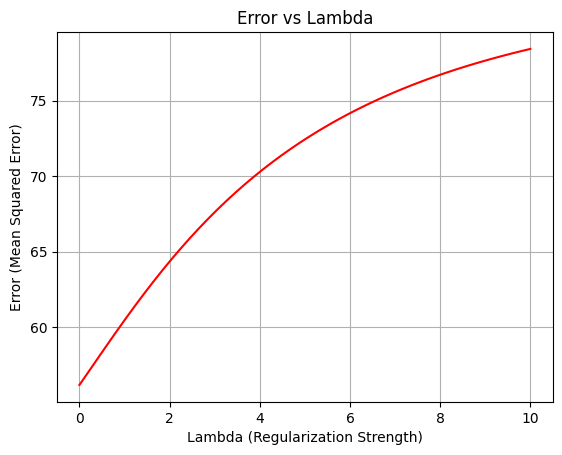

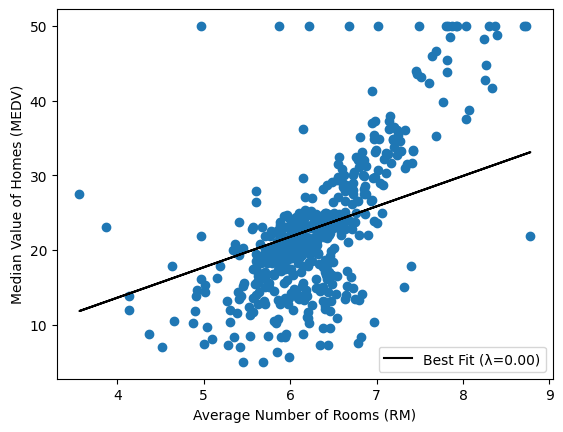

Best Lambda: 0.0
w: 4.076476926443063
b: -2.7019822030254863


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Boston.csv')

# Define features and target
X = df['rm'].values
Y = df['medv'].values

iterations = 1000
alpha = 0.01
lambdas = np.linspace(0, 10, 50)  # Lambda values from 0 to 10
errors = []  # To store error values for different lambdas

# Iterate over different lambda values
for lamda in lambdas:
    # Initialize weights and bias
    w = 1
    b = 1

    m = len(Y)  # number of samples

    # Gradient descent
    for i in range(iterations):
        y_cap = w * X + b
        error = y_cap - Y

        # Compute gradients (L2 regularization)
        gradient_w = (1/m) * np.sum(error * X) + lamda * w  # L2 regularization term (lamda * w)
        gradient_b = (1/m) * np.sum(error)

        # Update weights
        w = w - alpha * gradient_w
        b = b - alpha * gradient_b

    # Calculate the final error (mean squared error) for the current lambda
    y_cap_final = w * X + b
    final_error = (1/m) * np.sum((y_cap_final - Y)**2)
    errors.append(final_error)

# Plotting the error vs lambda graph
plt.plot(lambdas, errors, color='red')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Error (Mean Squared Error)')
plt.title('Error vs Lambda')
plt.grid(True)
plt.show()


#TO PLOT THE REGRESSION CURVE ALONG WITH THE SINGLE FEATURE AND THE BEST LAMBDA

w = 1  # reinitialize
b = 1

best_lambda = lambdas[np.argmin(errors)]  # Choose lambda with minimum error

for i in range(iterations):
    y_cap = w * X + b
    error = y_cap - Y

    gradient_w = (1/m) * np.sum(error * X) + best_lambda * w  # L2 regularization term (lamda * w)
    gradient_b = (1/m) * np.sum(error)

    w = w - alpha * gradient_w
    b = b - alpha * gradient_b

# Final prediction
f = w * X + b

# Plot the data and the fit
plt.scatter(X, Y, linewidth=1)
plt.plot(X, f, color='black', label=f'Best Fit (λ={best_lambda:.2f})')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.legend()
plt.show()

print("Best Lambda:", best_lambda)
print("w:", w)
print("b:", b)

Now trying for multivariable in the case of Boston Housing

The following are the MSE for the l1 l2 and normal Gradient Descent Methods
Ridge MSE: 23.064605610300195
Lasso MSE: 23.223641815597972
Normal Gradient Descent MSE: 128.43295713446173


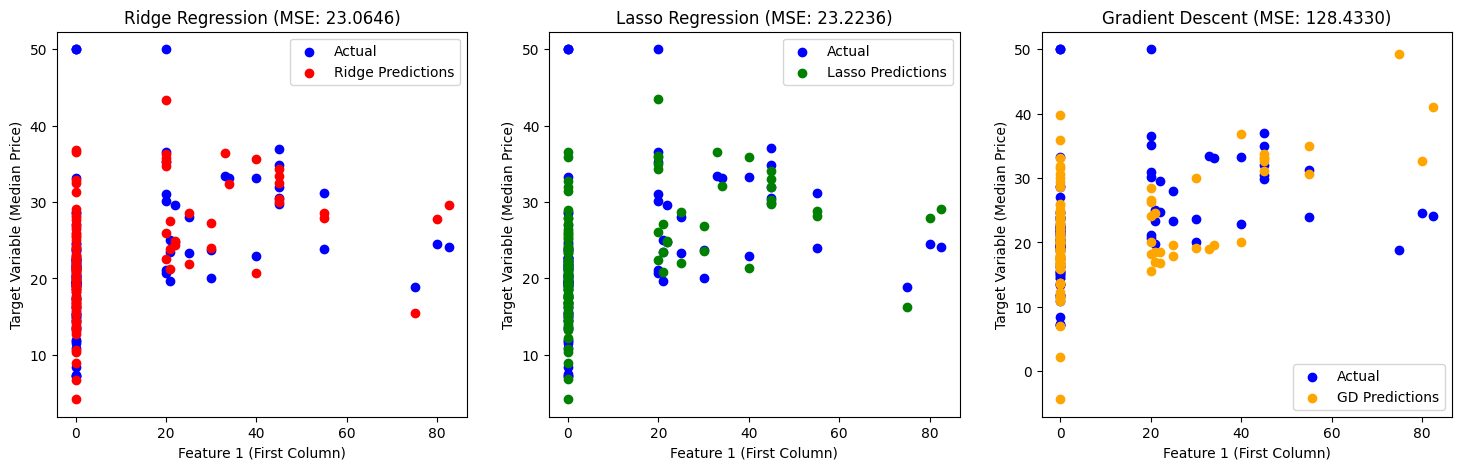

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Boston dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Boston.csv',header='infer')  # Update path as necessary
X = data.iloc[:, 1:-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values    # The last column as the target variable

# Add a bias term to the features
X_b = np.c_[np.ones(X.shape[0]), X]

# Split the data into training and testing sets
np.random.seed(42)
indices = np.random.permutation(X_b.shape[0])
train_size = int(0.8 * len(indices))
train_indices, test_indices = indices[:train_size], indices[train_size:]
X_train, X_test = X_b[train_indices], X_b[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Ridge regression function
def ridge_regression(X, y, alpha):
    n = X.shape[1]
    I = np.eye(n)
    return np.linalg.solve(X.T @ X + alpha * I, X.T @ y)

# Lasso regression using coordinate descent
def lasso_regression(X, y, alpha, num_iterations=1000, tol=1e-4):
    m, n = X.shape
    theta = np.random.randn(n)  # Initialize random weights
    for _ in range(num_iterations):
        theta_old = theta.copy()
        for j in range(n):
            temp_theta = theta[j]
            X_j = X[:, j]
            y_pred = X @ theta
            residual = y - y_pred + temp_theta * X_j
            theta[j] = np.sign(residual @ X_j) * max(0, np.abs(residual @ X_j) - alpha) / (X_j.T @ X_j)
        if np.sum(np.abs(theta - theta_old)) < tol:
            break
    return theta

# Initialize random weights for gradient descent
def gradient_descent(X, y, alpha, learning_rate=0.000001, num_iterations=10000):
    m, n = X.shape
    theta = np.random.randn(n)  # Random initialization of weights
    for _ in range(num_iterations):
        gradients = -2/m * X.T @ (y - X @ theta)
        theta -= learning_rate * gradients
    return theta

# Ridge regression
ridge_coefficients = ridge_regression(X_train, y_train, alpha=0.001)
y_pred_ridge_manual = X_test @ ridge_coefficients

# Lasso regression
lasso_coefficients = lasso_regression(X_train, y_train, alpha=0.001)
y_pred_lasso_manual = X_test @ lasso_coefficients

# Gradient descent for Lasso
# Note: Gradient descent is typically not used for Lasso, but we'll demonstrate it
gd_coefficients = gradient_descent(X_train, y_train, alpha=0.001)
y_pred_gd_manual = X_test @ gd_coefficients

# Mean squared error calculation
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

ridge_mse = mse(y_test, y_pred_ridge_manual)
lasso_mse = mse(y_test, y_pred_lasso_manual)
gd_mse = mse(y_test, y_pred_gd_manual)


print("The following are the MSE for the l1 l2 and normal Gradient Descent Methods")

print("Ridge MSE:",ridge_mse)
print("Lasso MSE:",lasso_mse)
print("Normal Gradient Descent MSE:",gd_mse)

# Plotting the results
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_test[:, 2], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 2], y_pred_ridge_manual, color='red', label='Ridge Predictions')
plt.xlabel('Feature 1 (First Column)')
plt.ylabel('Target Variable (Median Price)')
plt.title(f'Ridge Regression (MSE: {ridge_mse:.4f})')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 2], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 2], y_pred_lasso_manual, color='green', label='Lasso Predictions')
plt.xlabel('Feature 1 (First Column)')
plt.ylabel('Target Variable (Median Price)')
plt.title(f'Lasso Regression (MSE: {lasso_mse:.4f})')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 2], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 2], y_pred_gd_manual, color='orange', label='GD Predictions')
plt.xlabel('Feature 1 (First Column)')
plt.ylabel('Target Variable (Median Price)')
plt.title(f'Gradient Descent (MSE: {gd_mse:.4f})')
plt.legend()

plt.show()


Now trying ridge and lasso with **sklearn**  inbuilt libraries

The following are the MSE for Ridge and Lasso regression methods:
Ridge MSE: 22.77780230355789
Lasso MSE: 22.775416889109742


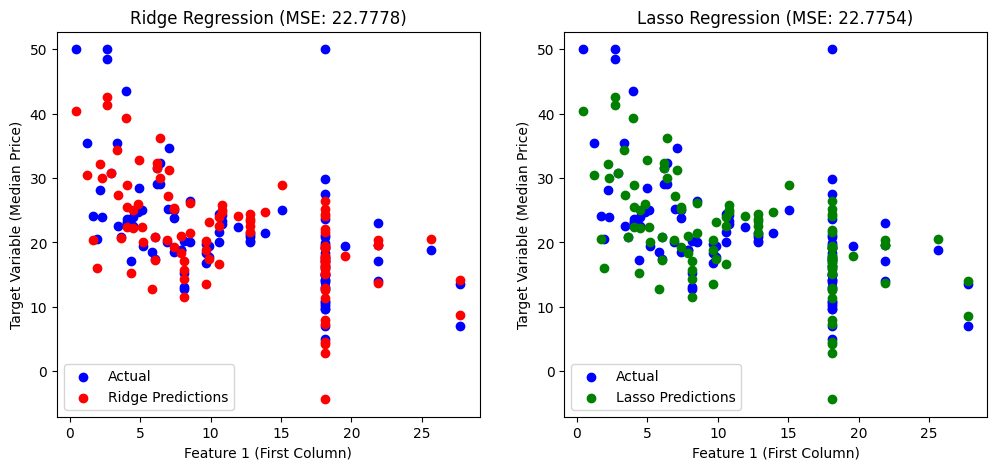

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Load the Boston dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Boston.csv', header='infer')  # Update path as necessary
X = data.iloc[:, 1:-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values    # The last column as the target variable

# Split the data into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression using sklearn
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso regression using sklearn
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Mean squared error calculation
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print("The following are the MSE for Ridge and Lasso regression methods:")
print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)

# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 2], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 2], y_pred_ridge, color='red', label='Ridge Predictions')
plt.xlabel('Feature 1 (First Column)')
plt.ylabel('Target Variable (Median Price)')
plt.title(f'Ridge Regression (MSE: {ridge_mse:.4f})')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 2], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 2], y_pred_lasso, color='green', label='Lasso Predictions')
plt.xlabel('Feature 1 (First Column)')
plt.ylabel('Target Variable (Median Price)')
plt.title(f'Lasso Regression (MSE: {lasso_mse:.4f})')
plt.legend()

plt.show()
